In [5]:
#import libraries
import cv2
import numpy as np
import os
import time

#capturing video
cap = cv2.VideoCapture(0)

#creating a folder named 'data' at the default location in which frames will be stored/saved
try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

    
sec=int(input("Enter the no. of seconds you want to shoot the video for:"))
k=sec*26
currentFrame = 0
m=0
while(m<=k):
    
    ret, frame = cap.read()
    
    #for saving those frames in the folder-'data' which contains the perfect hand gesture 
    #which can be then used for prediction
    if m%26==0:
        
        #saving/storing images in the folder with names as frame0,frame1,frame2 and so on
        name = './data/frame' + str(currentFrame) + '.jpg'
        print ('Creating...' + name)
        cv2.imwrite(name, frame)
        

    currentFrame += 1
    m=m+1
    
cap.release()
cv2.destroyAllWindows()

In [174]:
#importing libraries
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
import os

In [6]:
#import dataset
data1=pd.read_csv('C:/Users/Piku/Desktop/Internship/hand_sign_dataset_training-master/hand_sign_dataset_training-master/sign_mnist.csv')

In [7]:
#showing the data
data1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
#segregating dependent and independent variable
x=data1.drop(['label'],axis=1).values
y=data1['label'].values

In [9]:
#get training set and testing set using sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [10]:
#Calling algorithm for training and testing
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn= KNeighborsClassifier(n_neighbors=5)

In [12]:
#Training the data
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
#predictting output from input
ypred=knn.predict(xtest)

In [14]:
ypred.shape

(6864,)

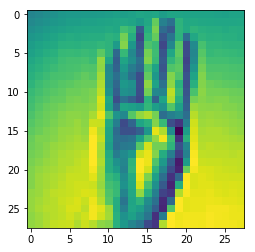

'B'

In [44]:
#plottng xtest
import matplotlib.pyplot as plt
d=xtest[40]
#print(d)
d.shape=(28,28)
plt.imshow(d)

plt.show()
#ytest[3]
d={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',
   14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}
d[ytest[40]]

In [167]:
#defining location where the frames to be predicted are stored
Test_dir='C:/Users/Piku/data'

In [168]:
#For Getting Features of images or pixels values of image
def create_test1():
    test_data=[] #will append samples
    for img in tqdm(os.listdir(Test_dir)):
        #l=get_label(img)  # no labels in this -l is the label
        path=os.path.join(Test_dir,img)
        im=cv2.imread(path,0)     #0-to read in one line and 1-for reading as it is
        im=cv2.resize(im,(28,28))
        test_data.append([im])
    
    return test_data

In [169]:
test=create_test1()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 170.83it/s]


In [170]:
#to change the type to numpy array
test=np.array(test)

In [171]:
test.shape

(11, 1, 28, 28)

In [172]:
test=test.reshape(11,784)

In [173]:
#plotting the frame to be predicted
ll=[]
for i in range(0,5):
    import matplotlib.pyplot as plt
    dio=test[i]
    dio.shape=(28,28)
    #plt.imshow(dio)

    plt.show()
    #print(d[int(ytest[6])])
   # print(knn.predict([test[i]]))
    print(d[int(knn.predict([test[i]]))])
    ll.append(d[int(knn.predict([test[i]]))])
print(ll)

A
G
G
G
A
['A', 'G', 'G', 'G', 'A']
